In [1]:
import bs4 as bs
import urllib.request
import spacy

In [2]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [3]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"ea6a83cb-4c85-4464-9f0f-59f653437e31","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":64746146,"wgRevisionId":64746146,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 ingl\xc3\xaas-fontes e

In [5]:
dados_html = bs.BeautifulSoup(dados, 'html.parser')
dados_html

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"ea6a83cb-4c85-4464-9f0f-59f653437e31","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":64746146,"wgRevisionId":64746146,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 inglês-fontes em língua (en)","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 manut:

In [6]:
paragrafos = dados_html.find_all('p')

In [7]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [8]:
conteudo = conteudo.lower()
conteudo

'\n\t\t\t\tpáginas para editores sem sessão iniciada saber mais\n\n\t\t\t\tcontents\n\t\t\t\tmove to sidebar\nhide\nna tecnologia, a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] onde seu principal objetivo é de executar funções de modo autônomo. \né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raci

## Mineração de texto

In [10]:
import pt_core_news_sm
pln = pt_core_news_sm.load()
pln

In [11]:
string = 'turing'
token_pesquisa = pln(string)

In [12]:
pln.vocab

In [13]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [14]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3047, 3048),
 (8661325627334373315, 3057, 3058),
 (8661325627334373315, 3213, 3214),
 (8661325627334373315, 3218, 3219),
 (8661325627334373315, 3224, 3225),
 (8661325627334373315, 3287, 3288),
 (8661325627334373315, 3919, 3920),
 (8661325627334373315, 5194, 5195),
 (8661325627334373315, 8663, 8664),
 (8661325627334373315, 8799, 8800),
 (8661325627334373315, 8895, 8896),
 (8661325627334373315, 9012, 9013)]

In [15]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [16]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

acadêmico,[2 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
circulares.[9 MISC
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglaterra L

In [17]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

In [18]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'máximo', 'seria', 'segundo', 'alguns', 'nove', 'dentro', 'treze', 'sexto', 'meio', 'outros', 'sobre', 'pôde', 'pode', 'poderá', 'nunca', 'eles', 'sua', 'tempo', 'uns', 'daquele', 'fazemos', 'pelo', 'aqui', 'tivemos', 'debaixo', 'aquele', 'posso', 'ontem', 'daquela', 'mal', 'mês', 'todo', 'quando', 'sem', 'vais', 'essas', 'apoio', 'põe', 'vossos', 'fora', 'momento', 'dão', 'teve', 'zero', 'oitava', 'pois', 'tudo', 'estes', 'ter', 'umas', 'sempre', 'essa', 'desde', 'for', 'sete', 'cujo', 'portanto', 'vem', 'mas', 'maiorias', 'tal', 'primeira', 'exemplo', 'do', 'nas', 'um', 'cá', 'boa', 'povo', 'esteve', 'entre', 'forma', 'é', 'mesmo', 'quero', 'vezes', 'vai', 'novo', 'aos', 'vós', 'sétimo', 'estás', 'obrigado', 'muito', 'em', 'comprida', 'numa', 'maioria', 'uma', 'assim', 'fostes', 'muitos', 'quer', 'nada', 'de', 'às', 'local', 'possivelmente', 'sistema', 'fazes', 'cima', 'dez', 'estão', 'aquela', 'tanto', 'último', 'estivestes', 'estar', 'dois', 'tentei', 'três', 'sois', 'adeus', 'sim

In [19]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [20]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [21]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [22]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

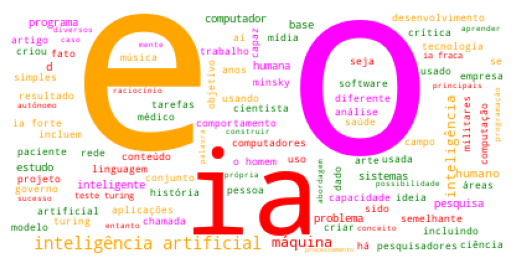

In [24]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()